<a href="https://colab.research.google.com/github/venkatesh-eranti/Housing_case-study_multiple_linear_regression/blob/main/multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
url='https://raw.githubusercontent.com/venkatesh-eranti/multiple_linear_regression/main/Housing.csv'

# Reading and Understanding the Data

## loading the necessary libraries

In [168]:
import numpy as np
import pandas as pd
# visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
# supress the warnings
import warnings
warnings.filterwarnings('ignore')
# splitting the data in to train and test
from sklearn.model_selection import train_test_split
# rescaling the features
from sklearn.preprocessing import MinMaxScaler
# feature selection using RFE
from sklearn.feature_selection import RFE
# to use RFE we need to model LinerRegression
from sklearn.linear_model import LinearRegression
# statsmoldes to build linear regression
import statsmodels.api as sm
# to check how much predictor variables are corelated eachother
from statsmodels.stats.outliers_influence import variance_inflation_factor
# evaluation metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

## loading the data

In [3]:
df=pd.read_csv(url)

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## understanding the data

In [5]:
df.shape

(545, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [12]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# visualising the data

## visualising Numerical data

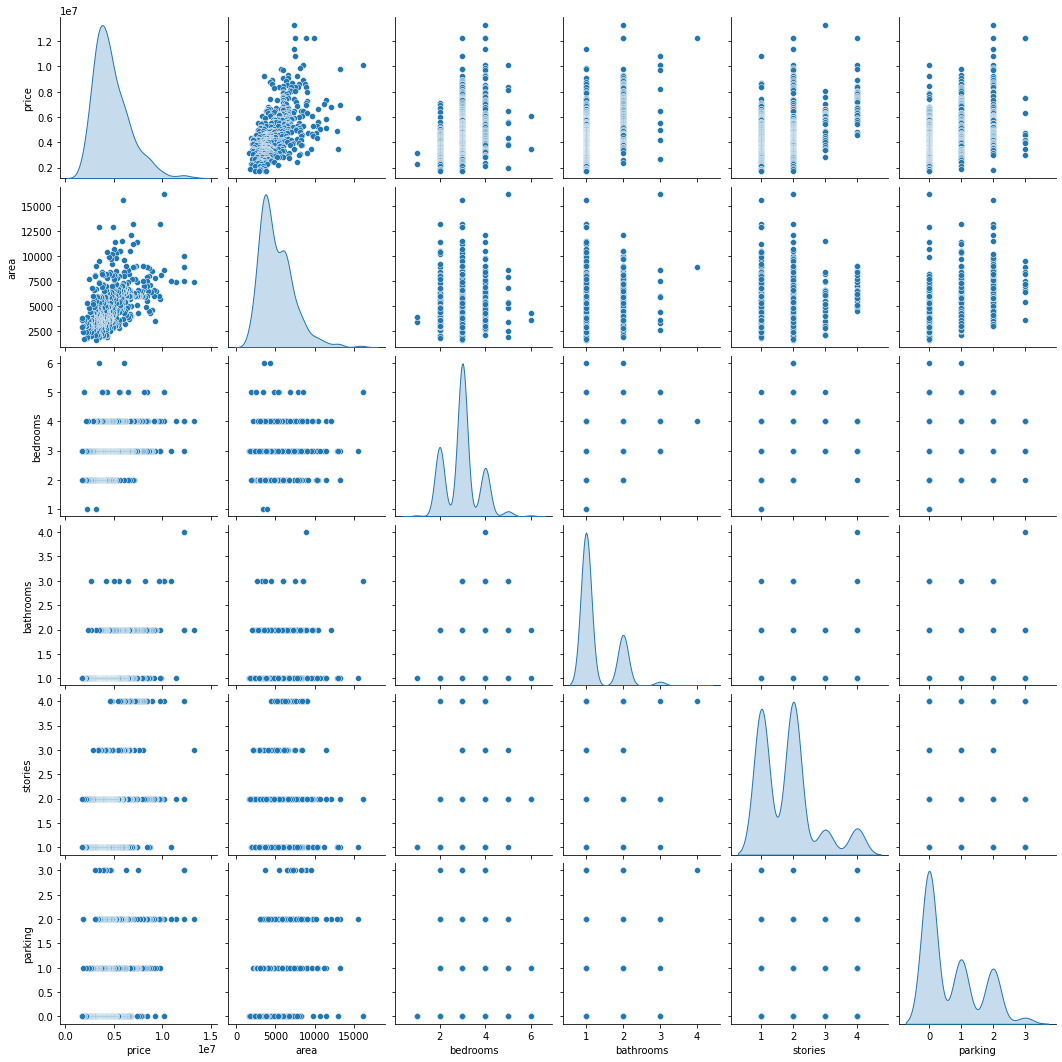

In [14]:
sns.pairplot(df,diag_kind='kde')

### observations from pair plot
* i can not see any `multicollinearity` in the predictor variables
* seems to have a strong linear realation between predictor variable (area) and response variable (price)



## visualising categorical variables

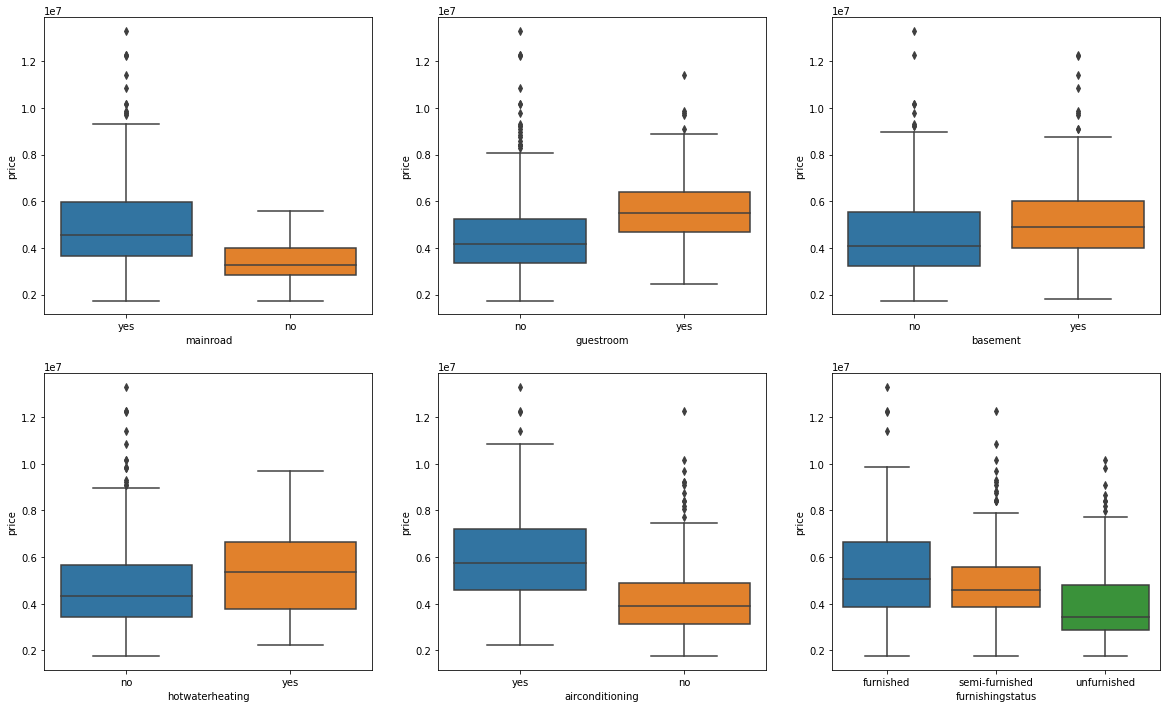

In [47]:
fig,axs=plt.subplots(nrows=2,ncols=3,figsize=(20,12))
sns.boxplot(df['mainroad'],df['price'],ax=axs[0,0])
sns.boxplot(df['guestroom'],df['price'],ax=axs[0,1])
sns.boxplot(df['basement'],df['price'],ax=axs[0,2])
sns.boxplot(df['hotwaterheating'],df['price'],ax=axs[1,0])
sns.boxplot(df['airconditioning'],df['price'],ax=axs[1,1])
sns.boxplot(df['furnishingstatus'],df['price'],ax=axs[1,2])
plt.show()

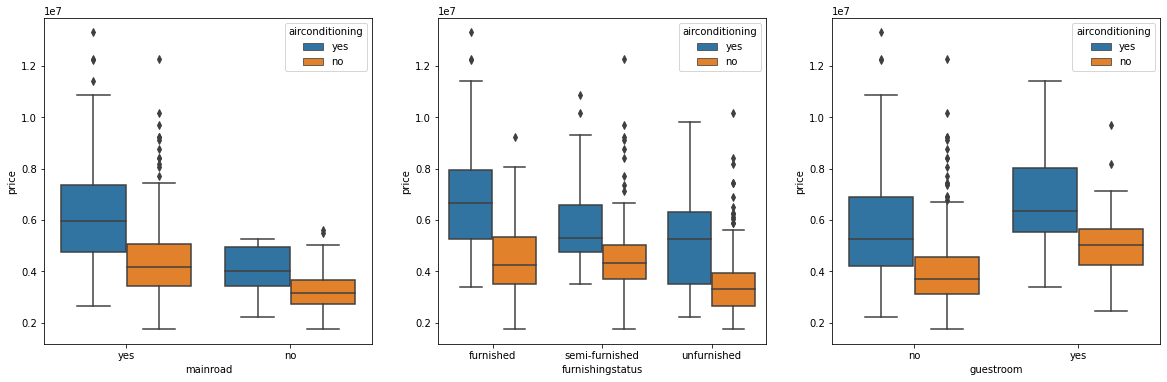

In [58]:
fig,axs=plt.subplots(ncols=3,figsize=(20,6))
sns.boxplot(df['mainroad'],df['price'],hue=df['airconditioning'],ax=axs[0])
sns.boxplot(df['furnishingstatus'],df['price'],hue=df['airconditioning'],ax=axs[1])
sns.boxplot(df['guestroom'],df['price'],hue=df['airconditioning'],ax=axs[2])
plt.show()

# Data Preparation

## changing string values in to numerical values

* yes $ \rightarrow $ 1
* no $\rightarrow$ 0

In [64]:
cat_vars=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
df[cat_vars]=df[cat_vars].apply(lambda x:x.replace({'yes':1,'no':0}))

`furnishingstatus` variables have there are 3 categorical variables. converting those also to number by using `dummy_variables`

In [69]:
df=df.join(pd.get_dummies(df['furnishingstatus'],drop_first=True))

dropping `furnishingstatus` feature from Dataframe

In [76]:
df.drop('furnishingstatus',axis=1,inplace=True)

In [77]:
df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0


# splitting the data in to train and test data

In [90]:
df_train,df_test=train_test_split(df,train_size=0.7,random_state=100)

In [91]:
df_train.shape,df_test.shape

((381, 14), (164, 14))

# Rescaling the features

* Here we can see that except for `area`, all the columns have small integer values. to have comparable scale it is important to rescale the variables. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation.
* another reason is scaling makes gradient descent processing faster

In [92]:
scalar=MinMaxScaler()

In [93]:
# applying minmaxscalar to all features except 0's and 1's
rescaling_features=['price','area','bedrooms','bathrooms','stories','parking']

In [96]:
df_train[rescaling_features]=scalar.fit_transform(df_train[rescaling_features])

In [97]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


# checking corelation in data to see which variables are highly correlated

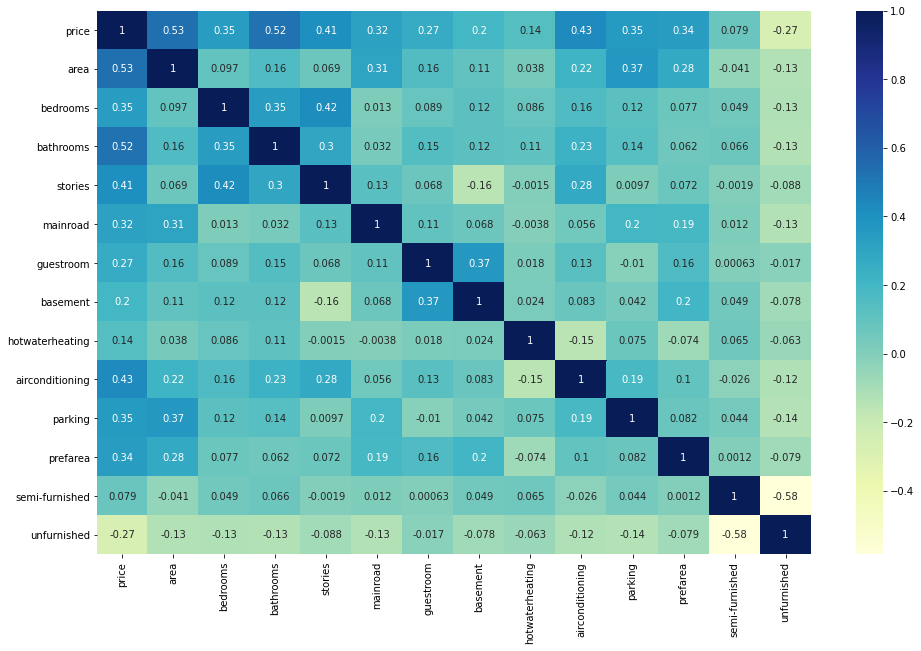

In [99]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# RFE (Recursive Feature Elimination)

## buidling a liner regression model using sklean

In [110]:
x=df_train.drop('price',axis=1)
y=df_train['price']

In [111]:
lin_sk=LinearRegression()

In [112]:
lin_sk.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## applying RFE on Liner Regression model

In [114]:
rfe=RFE(lin_sk,8) # selecting top 8 features

In [115]:
rfe=rfe.fit(x,y)

## getting the list of selected features

In [122]:
rfe_features=x.columns[rfe.support_]
rfe_features

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'hotwaterheating', 'airconditioning', 'prefarea'],
      dtype='object')

not selected features

In [119]:
x.columns[~rfe.support_]

Index(['guestroom', 'basement', 'parking', 'semi-furnished', 'unfurnished'], dtype='object')

# building Statsmodel to fine tune the model

In [124]:
x_train=x[rfe_features]

In [125]:
y_train=y

In [127]:
lm1=sm.OLS(y_train,sm.add_constant(x_train)).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     87.31
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           1.30e-80
Time:                        09:56:05   Log-Likelihood:                 365.19
No. Observations:                 381   AIC:                            -712.4
Df Residuals:                     372   BIC:                            -676.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0011      0.018     -0.059      0.953      -0.037       0.035
area                0.2714      0.030      9.155      0.000       0.213       0.330
bedrooms            0.0809      0.037      2.157      0.032       0.007       0.155
bathrooms           0.2084      0.023      9.243      0.000       0.164       0.253
stories             0.0896      0.019      4.738      0.000       0.052       0.127
mainroad            0.0642      0.015      4.389      0.000       0.035       0.093
hotwaterheating     0.0967      0.022      4.345      0.000       0.053       0.141
airconditioning     0.0791      0.011      6.875      0.000       0.056       0.102
prefarea            0.0668      0.012      5.572      0.000       0.043       0.090
==============================================================================
Omnibus:                       94.961   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.147
Skew:                           1.094   Prob(JB):                     4.99e-70
Kurtosis:                       6.913   Cond. No.                         12.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## observations from statsmodels
1. all the **`P-values`** are less than 0.05 $\rightarrow$ all coefficients are statistically significant. but,
2. $R^2$ and Adjusted $R^2$ have some difference that means still there is a room to reduce number of features. so we can check VIF


# VIF- Variance Inflation factor

In [130]:
vif1=pd.Series([variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])],index=x_train.columns)
vif1

area               4.274066
bedrooms           5.803994
bathrooms          1.620283
stories            2.416692
mainroad           5.433338
hotwaterheating    1.124548
airconditioning    1.706067
prefarea           1.445722
dtype: float64

## observations from VIF
* bedrooms and mainroad are correlated with each other. so i will remove bedrooms as it is highly corelated

# building another model by removing top corelated feature

In [132]:
x_train_bedrooms=x_train.drop('bedrooms',axis=1)

In [133]:
lm2=sm.OLS(y_train,sm.add_constant(x_train_bedrooms)).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     98.15
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           1.25e-80
Time:                        10:08:19   Log-Likelihood:                 362.82
No. Observations:                 381   AIC:                            -709.6
Df Residuals:                     373   BIC:                            -678.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0253      0.014      1.828      0.068      -0.002       0.052
area                0.2739      0.030      9.201      0.000       0.215       0.332
bathrooms           0.2197      0.022      9.974      0.000       0.176       0.263
stories             0.1038      0.018      5.827      0.000       0.069       0.139
mainroad            0.0622      0.015      4.238      0.000       0.033       0.091
hotwaterheating     0.1002      0.022      4.488      0.000       0.056       0.144
airconditioning     0.0794      0.012      6.871      0.000       0.057       0.102
prefarea            0.0680      0.012      5.647      0.000       0.044       0.092
==============================================================================
Omnibus:                      103.130   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              368.421
Skew:                           1.171   Prob(JB):                     9.96e-81
Kurtosis:                       7.210   Cond. No.                         9.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
vif2=pd.Series([variance_inflation_factor(x_train_bedrooms.values,i) for i in range(x_train_bedrooms.shape[1])],index=x_train_bedrooms.columns)
vif2

area               4.081065
bathrooms          1.549459
stories            2.105177
mainroad           4.092591
hotwaterheating    1.112780
airconditioning    1.700344
prefarea           1.445718
dtype: float64

as observed form R2, adjusted R2,P-values and VIF's the above 7 features are influencing the price of houses

# Residual analysis of train data

plotting histogram to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression)

In [136]:
y_train_pred=lm2.predict(sm.add_constant(x_train_bedrooms))

In [137]:
residual=y_train-y_train_pred

Text(0.5, 1.0, 'Error Terms')

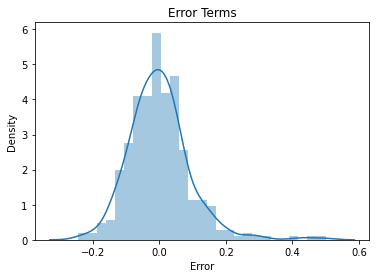

In [139]:
sns.distplot(residual)
plt.xlabel('Error')
plt.title('Error Terms')

# heteroscedasticity

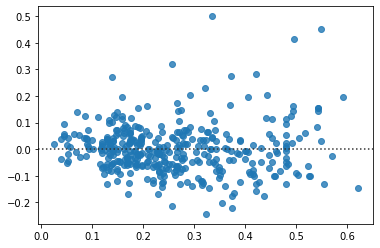

In [144]:
sns.residplot(y_train_pred,residual)

i can see very less **heteroscedasticity**  i.e., increase in variance. but can use the following to remove heteroscedasticity
* i can use **`log(y) `** or
* use GLM model (generalised line model)
* use WLS (weighted least squares) 

# making predictions using the final model

In [147]:
x_final_variables=x_train_bedrooms.columns
x_final_variables

Index(['area', 'bathrooms', 'stories', 'mainroad', 'hotwaterheating',
       'airconditioning', 'prefarea'],
      dtype='object')

In [160]:
df_test[rescaling_features]=scalar.transform(df_test[rescaling_features])

In [163]:
x_test=df_test[x_final_variables]
y_test=df_test['price']

In [166]:
y_test_pred=lm2.predict(sm.add_constant(x_test))

# model evaluation

In [169]:
r2_score(y_train,y_train_pred)

0.6481379759456384

In [170]:
r2_score(y_test,y_test_pred)

0.6101884142998946

results are with in 5% deviation so it is OK

In [171]:
mean_absolute_error(y_test,y_test_pred)

0.0793025384670538

In [172]:
mean_squared_error(y_test,y_test_pred)

0.01147208646379026

Text(0, 0.5, 'y_test_pred')

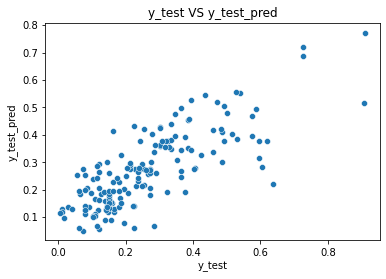

In [175]:
sns.scatterplot(y_test,y_test_pred)
plt.title('y_test VS y_test_pred')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

Interpretation

we can see that the equation of our best fitted line is: <br>
**`price`**= 0.02 + (0.27 $\times$ area) + (0.22 $\times$ bathrooms) + (0.1 $\times$ stories) + (0.06 $\times$ mainroad) + (0.1 $\times$ hot water heating) + ( 0.08 $\times$ air conditioning) + (0.07 $\times$ pref area)

* for every unit increase in area of home we can predict price of home will increase by 0.27 (by holding all other varialbles constant)
* for every unit increase in bathrooms of home we can predict price of home will increase by 0.22 (by holding all other varialbles constant)
...